---
<h1 style="text-align:center;"> Fashion MNIST</h1>

---

Dataset Information:

Fashion-MNIST is a dataset consisting of images of Zalando's articles. The dataset serves as a replacement for the original MNIST dataset and includes a training set of 60,000 examples and a test set of 10,000 examples. Each image is a grayscale 28x28 pixel image, associated with a label from 10 different classes. The goal is to provide a benchmark for machine learning algorithms, maintaining the same image size and structure as the original MNIST dataset.

Original MNIST dataset, known for handwritten digits, is widely used in the AI/ML/Data Science community for algorithm validation. The popularity stems from the belief that "If it doesn't work on MNIST, it won't work at all" and, conversely, "If it works on MNIST, it may still fail on others."

Zalando aims to replace the original MNIST dataset with Fashion-MNIST.

Dataset Details:
- Each image has dimensions of 28 pixels in height and 28 pixels in width, totaling 784 pixels.
- Pixel values range from 0 to 255, indicating the lightness or darkness of the pixel, with higher values indicating darker pixels.
- The dataset contains 785 columns, with the first column representing the class labels (clothing types), and the remaining columns containing pixel-values of the associated images.

Pixel Location:
- To locate a pixel in the image, use the formula x = i * 28 + j, where i and j are integers between 0 and 27. This formula represents the position of the pixel in a 28x28 matrix.

Labels:
- Each training and test example is labeled with one of the following classes:
  - 0: T-shirt/top
  - 1: Trouser
  - 2: Pullover
  - 3: Dress
  - 4: Coat
  - 5: Sandal
  - 6: Shirt
  - 7: Sneaker
  - 8: Bag
  - 9: Ankle boot

Summary:
- Each row in the dataset represents a separate image.
- Column 1 contains the class label.
- The remaining columns represent pixel numbers (784 total).
- Each value in the dataset corresponds to the darkness of the pixel, ranging from 1 to 255.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, learning_curve, validation_curve

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
train_data = pd.read_csv('fashion-mnist_train.csv')

In [3]:
test_data = pd.read_csv('fashion-mnist_test.csv')

In [4]:
# info from kaggle
labels = np.array(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

In [4]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(f'The training dataset has {train_data.shape[0]} rows and {train_data.shape[1]} columns and {train_data.isna().sum().sum()} null values')
print(f'The testin datatset has {test_data.shape[0]} rows and {test_data.shape[1]} columns {test_data.isna().sum().sum()} null values')

The training dataset has 60000 rows and 785 columns and 0 null values
The testin datatset has 10000 rows and 785 columns 0 null values


In [7]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
test_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [9]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [10]:
# types of the data
print(train_data.dtypes)
print('\n' +'-'*30 + '\n')
print(test_data.dtypes)

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object

------------------------------

label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object


In [11]:
print(train_data['label'].value_counts())
print('\n' + '-'*30 + '\n')
print(test_data['label'].value_counts())

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

------------------------------

label
0    1000
1    1000
2    1000
3    1000
8    1000
6    1000
5    1000
4    1000
7    1000
9    1000
Name: count, dtype: int64


We see that the classes are symmetrical

In [5]:
# split our data to X and y
X_train = train_data.drop("label", axis=1).values
y_train = train_data["label"].values
X_test = test_data.drop("label", axis=1).values
y_test = test_data["label"].values

In [35]:
# reshape the data to 28x28 for plotting
X_train_plot = X_train.reshape(-1,28,28)
X_test_plot = X_test.reshape(-1,28,28)

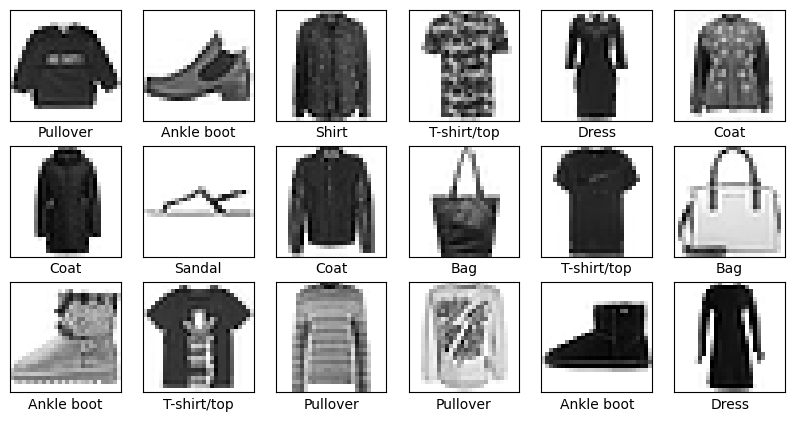

In [39]:
#plot first few images
plt.figure(figsize=(10,5))
for i in range(18):
    plt.subplot(3,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_plot[i], cmap = plt.cm.binary)
    plt.xlabel(labels[y_train[i]])
plt.show()

In [6]:
# convert from integers to floats
X_train = X_train.astype('float')
X_test = X_test.astype('float')

#normalising the data
X_train /= 255 
X_test /= 255

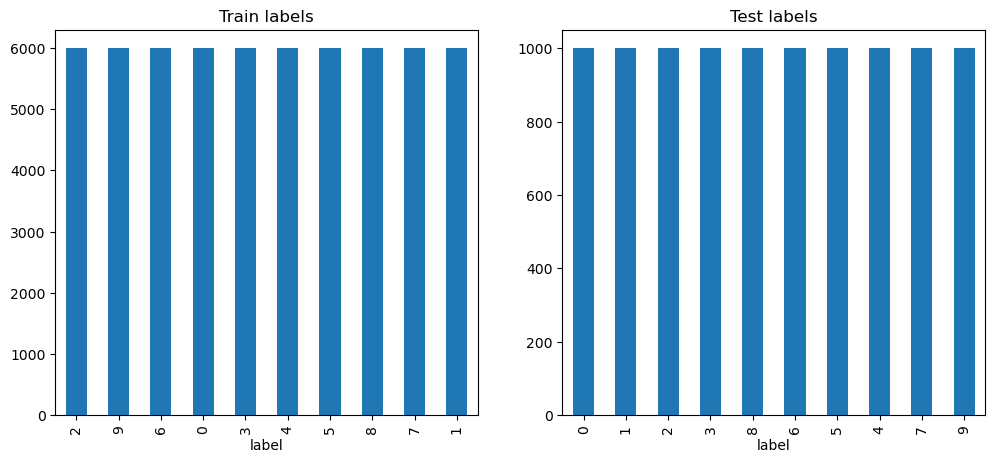

In [32]:
# Plot the distribution of the labels
palette = sns.color_palette("gray")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['label'].value_counts().plot(kind='bar')
plt.title('Train labels')
plt.subplot(1, 2, 2)
test_data['label'].value_counts().plot(kind='bar')
plt.title('Test labels')
plt.show()

As we saw before the labels are symetrical

---
---
---

In [ ]:
# X_train and X_test are the images scaled, y_train and y_test are the labels

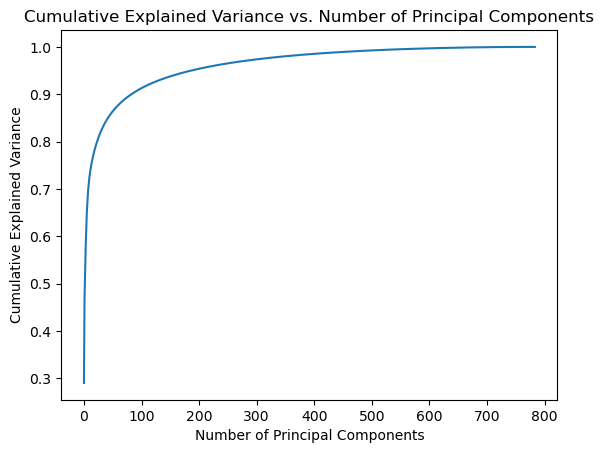

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_train is your training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Plot the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

plt.plot(cumulative_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Principal Components')
plt.show()


In [8]:
from sklearn.decomposition import PCA

# Assuming X_train is your training data
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Choose the number of components to keep (e.g., 95% of the variance)
target_variance = 0.95
num_components = next(i for i, cum_var in enumerate(pca.explained_variance_ratio_.cumsum()) if cum_var >= target_variance)

# Apply PCA with the selected number of components
pca = PCA(n_components=num_components)
X_train_pca = pca.fit_transform(X_train)


In [9]:
# Assuming X_test is your test data

# Transform the test data using the same PCA object
X_test_pca = pca.transform(X_test)

In [12]:
X_train_pca.shape



(60000, 186)

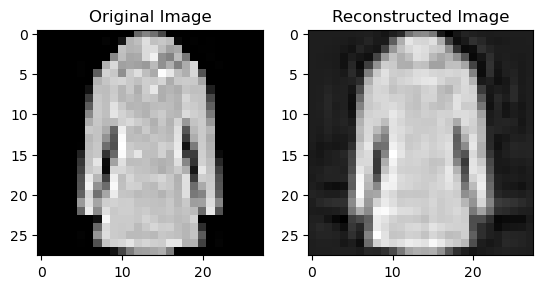

In [13]:
# Assuming X_test_pca is your PCA-transformed test data
# Assuming pca is the PCA object fitted on your training data

# Inverse transform to get back the original dimensions
X_test_reconstructed = pca.inverse_transform(X_test_pca)

# Reshape to the original image dimensions
X_test_reconstructed_reshaped = X_test_reconstructed.reshape(-1, 28, 28)

# Now, you can visualize the original and reconstructed images
import matplotlib.pyplot as plt
import random

# Choose a random index
index = random.randint(0, len(X_test) - 1)

# Plot the original image
plt.subplot(1, 2, 1)
plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
plt.title('Original Image')

# Plot the reconstructed image
plt.subplot(1, 2, 2)
plt.imshow(X_test_reconstructed_reshaped[index], cmap='gray')
plt.title('Reconstructed Image')

plt.show()


In [14]:
from sklearn.decomposition import PCA


# Assuming X_train, X_test, y_train, y_test are available

# Apply PCA on the training data
# pca = PCA(n_components=100)  # Choose the number of components
# X_train_pca = pca.fit_transform(X_train)

# # Transform the test data using the same PCA object
# X_test_pca = pca.transform(X_test)

# Train a model on the reduced-dimensionality training data
model = SVC()  # Example model, you can use any classifier
model.fit(X_train_pca, y_train)

# Make predictions on the reduced-dimensionality test data
y_pred = model.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8971


In [18]:
# Create an SVM model with RBF kernel
svm_model = SVC(kernel='rbf')

# Define the hyperparameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]
}

# Perform a grid search to find the best hyperparameters
random_search = RandomizedSearchCV(svm_model, param_grid, cv=5)
random_search.fit(X_train_pca, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Use the best model for predictions
best_svm_model = random_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_pca)

accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy: {accuracy_svm}")


/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [15]:
xgb_pca = XGBClassifier()
xgb_pca.fit(X_train_pca, y_train)
y_pred_xgb = xgb_pca.predict(X_test_pca)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

In [16]:
print(f"Accuracy: {accuracy_xgb}")

Accuracy: 0.8831


---
<h3 style="text-align:center;"> Models</h3>

---

In [10]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

dt_classification_report = classification_report(y_test, dt_predictions)
print(dt_classification_report)

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.95      0.96      0.95      1000
           2       0.70      0.68      0.69      1000
           3       0.84      0.81      0.83      1000
           4       0.67      0.68      0.67      1000
           5       0.90      0.87      0.89      1000
           6       0.55      0.56      0.56      1000
           7       0.85      0.87      0.86      1000
           8       0.92      0.91      0.91      1000
           9       0.89      0.90      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [11]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

lr_classification_report = classification_report(y_test, lr_predictions)
print(lr_classification_report)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      1000
           1       0.97      0.97      0.97      1000
           2       0.77      0.76      0.76      1000
           3       0.86      0.89      0.87      1000
           4       0.78      0.81      0.79      1000
           5       0.93      0.92      0.92      1000
           6       0.66      0.60      0.63      1000
           7       0.91      0.91      0.91      1000
           8       0.94      0.95      0.94      1000
           9       0.94      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.86     10000
weighted avg       0.85      0.86      0.86     10000



c:\Users\tsentelisd\OneDrive - Vodafone Group\Desktop\Temp\Machine-Learning-2\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
# SVM
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

svm_report = classification_report(y_test, svm_predictions)
print(svm_report)

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.95      0.97      0.96      1000
           2       0.70      0.67      0.68      1000
           3       0.82      0.80      0.81      1000
           4       0.67      0.69      0.68      1000
           5       0.90      0.87      0.88      1000
           6       0.56      0.56      0.56      1000
           7       0.86      0.85      0.86      1000
           8       0.91      0.91      0.91      1000
           9       0.89      0.90      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [56]:
# random forest 
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

rf_report = classification_report(y_test, rf_predictions)
print(rf_report)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.80      0.80      1000
           3       0.89      0.93      0.91      1000
           4       0.80      0.87      0.84      1000
           5       0.97      0.95      0.96      1000
           6       0.74      0.59      0.66      1000
           7       0.92      0.93      0.93      1000
           8       0.95      0.97      0.96      1000
           9       0.94      0.95      0.94      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [53]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

xgb_report = classification_report(y_test, xgb_predictions)
print(xgb_report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.85      0.83      0.84      1000
           3       0.92      0.93      0.92      1000
           4       0.85      0.88      0.87      1000
           5       0.99      0.96      0.98      1000
           6       0.75      0.71      0.73      1000
           7       0.95      0.96      0.95      1000
           8       0.97      0.98      0.98      1000
           9       0.96      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



So we can use the random forest for speed or the xgboost for additional accuracy

In [12]:
# split the data
X_train_train, X_train_val, y_train_train, y_train_val = train_test_split(X_train, y_train, stratify=y_train, test_size=best_1.2, random_state=9)

In [73]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [74]:
rf_model = RandomForestClassifier()

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_params, n_iter=10, cv=5, scoring='accuracy', random_state=9)
random_search.fit(X_train_train, y_train_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Validate on the validation set
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train_train, y_train_train)

# Validate on the validation set
validation_accuracy = best_rf_model.score(X_train_val, y_train_val)
print("Validation Accuracy:", validation_accuracy)


/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/tselentis/miniconda3/envs/dtsc3.11/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set

Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'gini', 'bootstrap': False}
Validation Accuracy: 0.8863333333333333


In [75]:
rf_model = RandomForestClassifier(**best_params)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)


In [77]:
print(classification_report(y_test, rf_predictions))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.81      0.81      1000
           3       0.90      0.93      0.91      1000
           4       0.80      0.85      0.83      1000
           5       0.97      0.95      0.96      1000
           6       0.73      0.62      0.67      1000
           7       0.93      0.94      0.93      1000
           8       0.97      0.98      0.97      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



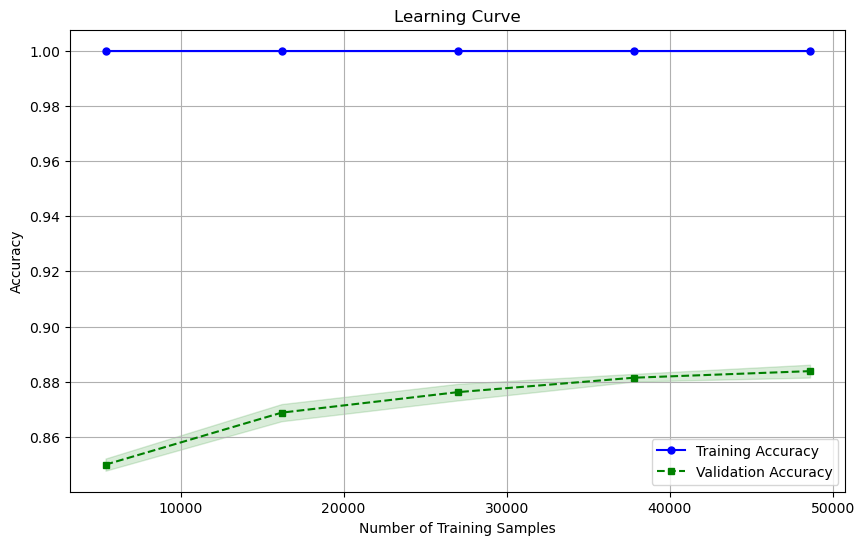

In [86]:
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=10, scoring='accuracy', train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], shuffle=True
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

# Add labels and title
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Adaboodt only 0.69

---

In [18]:
xgb_param = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 0.2],
    'lambda': [0, 1, 2],
    'alpha': [0, 1, 2],
    'objective': ['reg:squarederror', 'multi:softmax']
}


In [19]:

xgb = XGBClassifier()

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=xgb_param, n_iter=10, cv=5, scoring='accuracy', random_state=9)
random_search.fit(X_train_train, y_train_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

# Validate on the validation set
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train_train, y_train_train)

# Validate on the validation set
validation_accuracy = best_xgb_model.score(X_train_val, y_train_val)
print("Validation Accuracy:", validation_accuracy)

Best Hyperparameters: {'subsample': 0.9, 'objective': 'multi:softmax', 'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.3, 'lambda': 0, 'gamma': 0.1, 'colsample_bytree': 0.8, 'alpha': 1}
Validation Accuracy: 0.9015833333333333


In [20]:
xgb_model = XGBClassifier(**best_params)
xgb_model.fit(X_train, y_train)
xgb_prediction = xgb_model.predict(X_test)

print(classification_report(y_test, xgb_prediction))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1000
           1       0.99      0.99      0.99      1000
           2       0.85      0.85      0.85      1000
           3       0.92      0.93      0.92      1000
           4       0.86      0.88      0.87      1000
           5       0.99      0.96      0.97      1000
           6       0.77      0.71      0.74      1000
           7       0.94      0.96      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



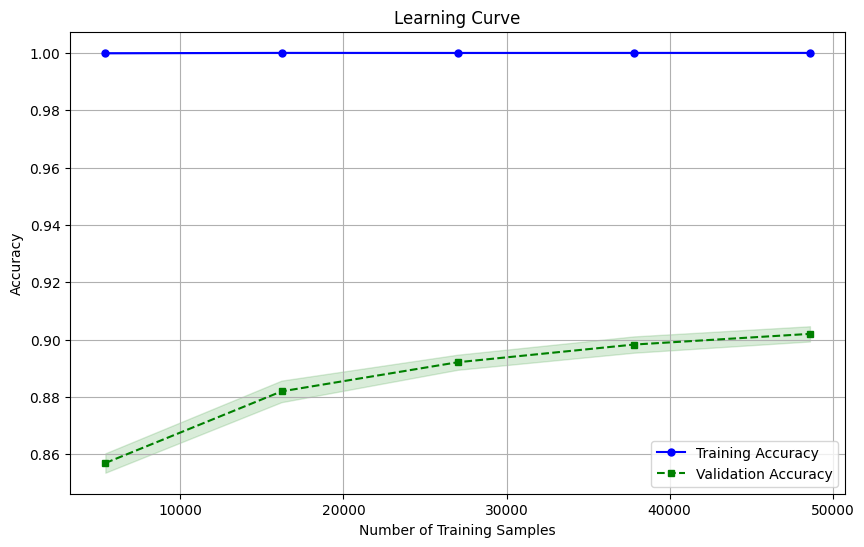

In [21]:
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X_train, y_train, cv=10, scoring='accuracy', train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], shuffle=True
)

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.15, color='green')

# Add labels and title
plt.xlabel('Number of Training Samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()